In [2]:
import pandas as pd
import numpy as np
import seaborn as sns


In [3]:
df = pd.read_csv('housedata.csv')

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
for i in df.columns:
    print(df[i].value_counts())
    print("*"*20)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
********************
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
********************
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
********************
size
2 BHK    

In [6]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
df.drop(columns =['availability','society','balcony'],axis=1,inplace = True)

In [8]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


## Location 

In [10]:
location = df.location.value_counts()

In [11]:
print(location.to_string())

location
Whitefield                                            540
Sarjapur  Road                                        399
Electronic City                                       302
Kanakpura Road                                        273
Thanisandra                                           234
Yelahanka                                             213
Uttarahalli                                           186
Hebbal                                                177
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Bannerghatta Road                                     152
Hennur Road                                           152
7th Phase JP Nagar                                    149
Haralur Road                                          142
Electronic City Phase II                              132
Rajaji Nagar                                          107
Chandapura                                            100
Bella

In [12]:
df['location']=df.location.fillna('sarjapur Road')

In [13]:
df['location']=df['location'].apply(lambda x: x.strip())
location_count=df['location'].value_counts()

### Threshold for balancing the location

In [15]:
location_count_lessthen_10=location_count[location_count
<=10]


In [16]:
df['location']=df['location'].apply(lambda x: 'Other' if x in location_count_lessthen_10 else x)

In [17]:
location_count_lessthen_30=location_count[location_count
<=30]

In [18]:
df['location']=df['location'].apply(lambda x: 'Uttarahalli ' if x in location_count_lessthen_30 else x)

In [19]:
location_count_lessthen_50=location_count[location_count
<=50]

In [20]:
df['location']=df['location'].apply(lambda x: 'Whitefield' if x in location_count_lessthen_50 else x)

In [21]:
location_count_lessthen_130=location_count[location_count
<=130]

In [22]:
df['location']=df['location'].apply(lambda x: 'Sarjapur  Road' if x in location_count_lessthen_130 else x)

In [23]:
location_count_lessthen_273=location_count[location_count
<=273]

In [24]:
df['location']=df['location'].apply(lambda x: 'Electronic City' if x in location_count_lessthen_273 else x)

In [25]:
print(df.location.value_counts().to_string())

location
Sarjapur  Road     3074
Other              2886
Uttarahalli        2614
Electronic City    2463
Whitefield         2283


## Size

In [27]:
df['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [28]:
df['size']=df['size'].fillna('2 BHK')

In [29]:
df['BHK']=df['size'].str.split().str.get(0).astype(int)

In [30]:
df["BHK"]

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: BHK, Length: 13320, dtype: int32

<Axes: ylabel='BHK'>

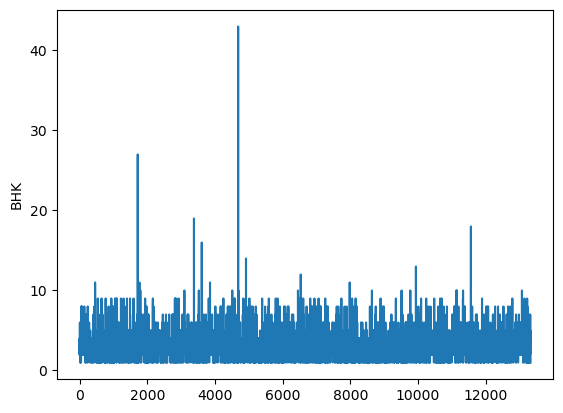

In [31]:
sns.lineplot(df.BHK)

In [32]:
df[df.BHK>20]

,area_type,location,size,total_sqft,bath,price,BHK
1718,Super built-up Area,Other,27 BHK,8000,27.0,230.0,27
4684,Plot Area,Uttarahalli,43 Bedroom,2400,40.0,660.0,43


In [33]:
# handling bath nan values
df['bath']=df['bath'].fillna(df['bath'].median())

### Total Sqft

In [35]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [36]:
def convertRange(x):
    split_data=x.split('-')
    if len(split_data)==2:
        return (float(split_data[0])+float(split_data[1]))/2
    try:
        return float(x)
    except:
        return None

In [37]:
df['total_sqft']=df['total_sqft'].apply(convertRange)
df['total_sqft']

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13320, dtype: float64

In [38]:
df.head()

,area_type,location,size,total_sqft,bath,price,BHK
0,Super built-up Area,Electronic City,2 BHK,1056.0,2.0,39.07,2
1,Plot Area,Uttarahalli,4 Bedroom,2600.0,5.0,120.00,4
2,Built-up Area,Electronic City,3 BHK,1440.0,2.0,62.00,3
3,Super built-up Area,Uttarahalli,3 BHK,1521.0,3.0,95.00,3
4,Super built-up Area,Sarjapur Road,2 BHK,1200.0,2.0,51.00,2


### Price per sq ft

In [40]:
df['price_per_sqft']=(df['price']*100000)/df['total_sqft']

In [41]:
df['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [42]:
df.head()

,area_type,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Uttarahalli,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Electronic City,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Uttarahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Sarjapur Road,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [43]:
df.price_per_sqft.describe()

count    1.327400e+04
mean     7.907501e+03
std      1.064296e+05
min      2.678298e+02
25%      4.266865e+03
50%      5.434306e+03
75%      7.311746e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

### Handling Outliers

In [45]:
def remove_outlier_of_sqft(data):
    # create dataframe
    df_output=pd.DataFrame()
    # one location mean every location
    for key,subdf in data.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        sd=np.std(subdf.price_per_sqft)
        gen_df=subdf[(subdf.price_per_sqft>(m-sd)) &(subdf.price_per_sqft<=(m+sd))]
        df_output=pd.concat([df_output,gen_df],ignore_index=True)
    return df_output
df=remove_outlier_of_sqft(df)
df.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,12652.000000,12652.000000,12652.000000,12652.000000,12652.000000
mean,1539.087691,2.626462,104.350228,2.739251,6284.279367
std,1139.477428,1.239378,136.291347,1.184531,3625.653426
min,250.000000,1.000000,8.000000,1.000000,267.829813
25%,1100.000000,2.000000,49.350000,2.000000,4236.571334
50%,1275.000000,2.000000,70.000000,3.000000,5319.148936
75%,1656.000000,3.000000,110.000000,3.000000,6970.069701
max,52272.000000,27.000000,3600.000000,27.000000,53150.000000


In [46]:
def bhk_outlier_remover(data):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        # print(location,bhk_stats)
        for bhk,bhk_df in location_df.groupby('BHK'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [47]:
df=bhk_outlier_remover(df)

In [48]:
df.drop(columns=['size','price_per_sqft'],axis =1,inplace=True)

In [49]:
df.head()

,area_type,location,total_sqft,bath,price,BHK
2,Super built-up Area,Electronic City,1310.0,3.0,63.25,3
5,Super built-up Area,Electronic City,510.0,1.0,25.25,1
8,Super built-up Area,Electronic City,2475.0,4.0,186.00,4
9,Super built-up Area,Electronic City,1760.0,2.0,123.00,3
13,Plot Area,Electronic City,660.0,1.0,48.00,1


In [50]:
# df.drop('area_type',axis=1,inplace=True)

In [51]:
df_reset = df.reset_index(drop=True,inplace = True)

In [52]:
df.head()

,area_type,location,total_sqft,bath,price,BHK
0,Super built-up Area,Electronic City,1310.0,3.0,63.25,3
1,Super built-up Area,Electronic City,510.0,1.0,25.25,1
2,Super built-up Area,Electronic City,2475.0,4.0,186.00,4
3,Super built-up Area,Electronic City,1760.0,2.0,123.00,3
4,Plot Area,Electronic City,660.0,1.0,48.00,1


In [53]:
df.to_csv('final-data.csv')

In [54]:
df.head()

,area_type,location,total_sqft,bath,price,BHK
0,Super built-up Area,Electronic City,1310.0,3.0,63.25,3
1,Super built-up Area,Electronic City,510.0,1.0,25.25,1
2,Super built-up Area,Electronic City,2475.0,4.0,186.00,4
3,Super built-up Area,Electronic City,1760.0,2.0,123.00,3
4,Plot Area,Electronic City,660.0,1.0,48.00,1


### Splitting the data into X and Y

In [56]:
# all feature are in x except price 
X=df.drop(columns=['price'])
# y is predictor so price is pridictor
y=df['price']

In [57]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [59]:
# We can ignore these step bcoz we can perform one hot encoding
label_encoder = LabelEncoder()
X_train['location'] = label_encoder.fit_transform(X_train['location'])
X_test['location'] = label_encoder.fit_transform(X_test['location'])

X_train['area_type'] = label_encoder.fit_transform(X_train['area_type'])
X_test['area_type'] = label_encoder.fit_transform(X_test['area_type'])

In [60]:
X_train.reset_index(drop=True,inplace = True)

In [61]:
X_test.reset_index(drop=True,inplace = True)

### Modeling

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf


In [64]:
column_trans=make_column_transformer((OneHotEncoder(sparse_output=False),['location','area_type']),
                                     remainder='passthrough')

In [65]:
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(sparse_output=False),
                                 ['location', 'area_type'])])

In [66]:
scaler=StandardScaler()

In [67]:
model = xgb.XGBRegressor(objective='reg:squarederror')

In [68]:
pipe=make_pipeline(column_trans,scaler,model)

In [69]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location', 'area_type'])])),
                ('standardscaler', StandardScaler()),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None,...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [70]:
y_pred_lr=pipe.predict(X_test)

In [71]:
r2_score(y_test,y_pred_lr)

0.7829625629535223